## Implement a DNN for solving the polynomial equation $𝑦 = 5𝑥^3 − 10𝑥^2 − 20𝑥 + 10$

### Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation

### Define the polynomial equation

In [2]:
def polynomial(x):
  return (5 * (x**3) - 10 * (x**2) - 20*x + 10)

### a) Build the model

In [3]:
input = Input((1,), name='InputLayer')
x = Dense(32, activation='relu', name='Layer_1')(input)
x = Dense(64, activation='relu', name='Layer_2')(x)
x = Dense(128, activation='relu', name='Layer_3')(x)
output = Dense(1, name='OutputLayer')(x)
model = Model(input, output, name="DNN_Model")
model.summary()

Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_1 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

### b) Generate and normalize dataset

#### Generate dataset within the range of -20 to +20

In [4]:
def dataset(l=-20, r=20, n=1000):
  x = np.random.uniform(l, r, n)
  y = polynomial(x)
  return x, y

#### Normalize the dataset withing the range -1 to +1

In [5]:
def normalize(x):
  min = np.min(x)
  max = np.max(x)

  return 2 * (x - min) / (max - min) - 1

### c) Split, train, test, and validate

#### Split: 5% for testing, 5% for validating, and rest for training

In [6]:
n = 1000
x, y = dataset(n=n)

x_norm = normalize(x)
y_norm = normalize(y)

x_train, x_rest, y_train, y_rest = train_test_split(x_norm, y_norm, test_size=0.1, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42)

In [7]:
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)
print(x_train.shape, y_train.shape)

(50,) (50,)
(50,) (50,)
(900,) (900,)


##### Explore `random_state=`:

In [8]:
p, q = dataset(n=100)

print("Random State: 42")
a, b, c, d = train_test_split(p, q, test_size=0.1, random_state=42)
print(d[:10])
print()
print("Random State: 60")
a, b, c, d = train_test_split(p, q, test_size=0.1, random_state=60)
print(d[:10])
print()
print("Random State: 0")
a, b, c, d = train_test_split(p, q, test_size=0.1, random_state=0)
print(d[:10])
print()
print("Random State:")
a, b, c, d = train_test_split(p, q, test_size=0.1)
print(d[:10])
print('-'*60)
print("Random State: 42")
a, b, c, d = train_test_split(p, q, test_size=0.1, random_state=42)
print(d[:10])
print()
print("Random State: 60")
a, b, c, d = train_test_split(p, q, test_size=0.1, random_state=60)
print(d[:10])
print()
print("Random State: 0")
a, b, c, d = train_test_split(p, q, test_size=0.1, random_state=0)
print(d[:10])
print()
print("Random State:")
a, b, c, d = train_test_split(p, q, test_size=0.1)
print(d[:10])

Random State: 42
[ 4.98613128e+03  1.35566434e+04 -6.00066002e+03  1.02649844e+04
  2.01957936e+04  1.40201930e+01  3.79442191e+03  4.38020647e+03
 -1.83665996e+04 -5.04292257e+03]

Random State: 60
[ 7981.62223343 22197.24206135  2511.38099492  -149.07498109
  -590.86064137  1136.58249053  2500.64234189 -3153.94159833
  -731.5983707  -1976.74906631]

Random State: 0
[-7.50080880e+03  9.03723651e+00 -1.29382215e+03 -5.90860641e+02
 -1.31984026e+04  1.22957990e+04  3.82395611e+03  1.58279006e+04
  9.58575068e+02  3.77612430e+03]

Random State:
[-3.95062840e+03  2.73785906e+04 -4.31571513e+03  5.77320474e+01
 -1.34097996e+01  3.79442191e+03  1.02649844e+04  4.78226719e+03
 -3.03442078e+04 -6.17122598e+03]
------------------------------------------------------------
Random State: 42
[ 4.98613128e+03  1.35566434e+04 -6.00066002e+03  1.02649844e+04
  2.01957936e+04  1.40201930e+01  3.79442191e+03  4.38020647e+03
 -1.83665996e+04 -5.04292257e+03]

Random State: 60
[ 7981.62223343 22197.24206

#### Plot the testing, validation, and validation split

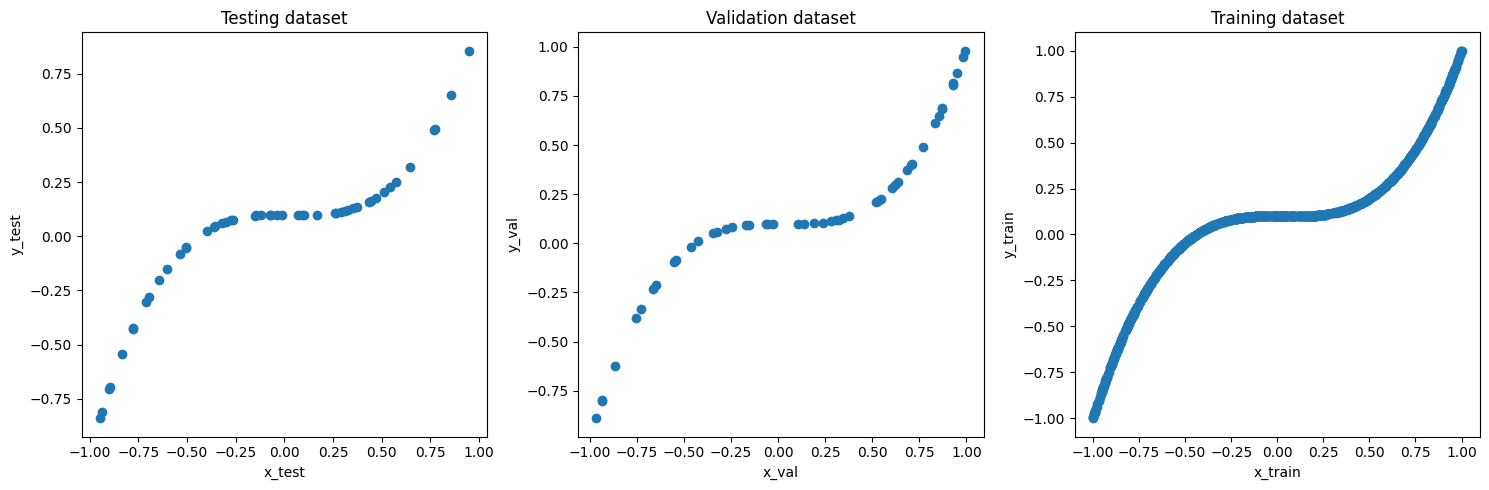

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Testing dataset')
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')

plt.subplot(1,3,2)
plt.title('Validation dataset')
plt.scatter(x_val, y_val)
plt.xlabel('x_val')
plt.ylabel('y_val')

plt.subplot(1,3,3)
plt.title('Training dataset')
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')

plt.tight_layout()
plt.show()

#### Training the model with validation

In [10]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=[R2Score(name='accuracy')])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val)).history

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5276 - loss: 0.0618 - val_accuracy: 0.8551 - val_loss: 0.0251
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.0211 - val_accuracy: 0.9030 - val_loss: 0.0168
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9234 - loss: 0.0115 - val_accuracy: 0.9435 - val_loss: 0.0098
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9621 - loss: 0.0056 - val_accuracy: 0.9665 - val_loss: 0.0058
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9753 - loss: 0.0036 - val_accuracy: 0.9846 - val_loss: 0.0027
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9884 - loss: 0.0017 - val_accuracy: 0.9916 - val_loss: 0.0015
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0010 - val_accuracy: 0.9946 - val_loss: 9.3717e-04
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 7.2309e-04 - val_accuracy: 0.9966 - 

#### Evaluate the model with test dataset

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9990 - loss: 1.0568e-04 
Test Loss: 9.985815995605662e-05
Test Accuracy: 0.9990851283073425


### d) Display the training accuracy vs validation accuracy and training error vs validation error curves

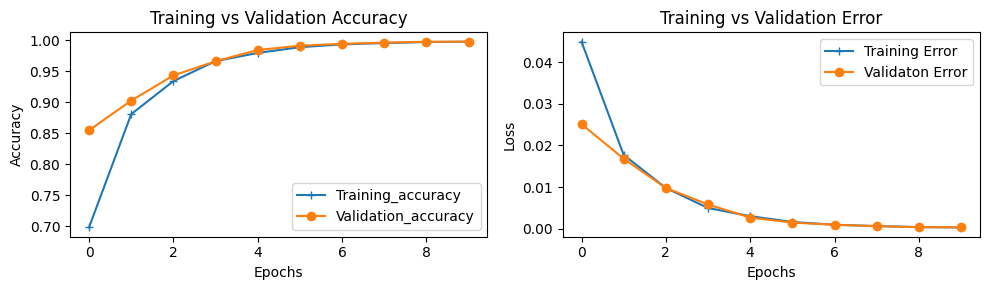

In [12]:
plt.figure(figsize=(10,3))

# Plot Training and Validation Accuracy
plt.subplot(1,2,1)
plt.title('Training vs Validation Accuracy')
plt.plot(history['accuracy'], marker = '+')
plt.plot(history['val_accuracy'], marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Error
plt.subplot(1,2,2)
plt.title('Training vs Validation Error')
plt.plot(history['loss'], marker = '+')
plt.plot(history['val_loss'], marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Error', 'Validaton Error'])

plt.tight_layout()
plt.show()

### Comparing Mathematical and Predicted values

In [13]:
x = np.array(range(-50, 50))
y_math = normalize(polynomial(x))
x_norm = normalize(x)
y_pred = model.predict(x_norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


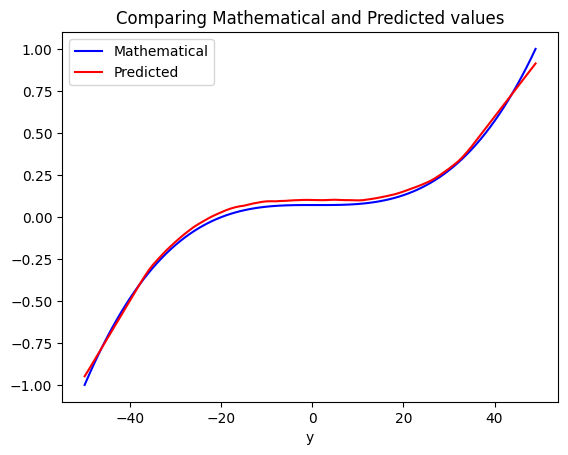

In [14]:
plt.title('Comparing Mathematical and Predicted values')
plt.plot(x, y_math, 'b')
plt.plot(x, y_pred, 'r')
plt.xlabel('x')
plt.xlabel('y')
plt.legend(['Mathematical', 'Predicted'])
plt.show()